# Assignment: Linear Regression
In this assignment you will implement Linear Regression for a very simple test case. Please fill into the marked places of the code
  
  (1) the cost function
  (2) the update function for Gradient Descent

Things that need to be updated are marked with "HERE YOU ..."

This assignment is kept very simple on purpose to help you familiarize with Python (Jupyter notebooks) and Linear Regression. Feel free to make some useful tests such as, but not limited to:
- What happens if the learning rate is too high or too low?
- Can Linear Regression really find the absolute global minimum?
- What effect does it have if you change the initial guess for the gradient descent to something completely off?
- What happens if you are not updating thet0 and thet1 "simultaneously" but you are updating both parameters in separate for loops (see below)?
- You can try to turn this code for Linear Regression into an implementation of Logistic Regression

## Import the required packages

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from sympy import symbols, diff

## Function to calculate the Gradiend descent

In [132]:
def gradientDescent(x, y, theta, alpha, m, maxsteps):
    # HERE YOU HAVE TO IMPLEMENT THE UPDATE OF THE PARAMETERS
    thetaHist=np.empty([maxsteps, 2])
#     xTrans = x.transpose()
    for i in range(0, maxsteps):
        loss = costFunction(x,y,theta)[1]
        theta[0] = theta[0] - (alpha/m) * sum(loss)
        theta[1] = theta[1] - (alpha/m) * sum(np.multiply(x[:,1], loss))
        thetaHist[i] = theta
   
    return theta, thetaHist

## Function to calcultate the cost function
The cost function template is returning two parameters, loss and cost. We proposed these two paremeters to facilitate the debugging (having not only the cost but also the difference between y and the prediction directly). You do not need to use both. Just the cost is enough to complete the assignment.

In [133]:
def costFunction(x, y, theta):
    # HERE YOU HAVE TO IMPLEMENT THE COST FUNCTION
    loss = np.dot(x,theta) - y
    cost = (1/ 2 * m) * sum(loss**2)
    return cost,loss

## Define some training data
To test your algorithm it is a good idea to start with very simple test data where you know the right answer. So let's put all data points on a line first. Variables x and y represent a (very simple) training set (a dataset with different samples). Feel free to play with this test data or use a more realistic one.

$NOTE:$ The column with 1’s included in the variable x is used to facilitate the calculations in the Gradient Descent function (do you remember the x<sub>0</sub> to use the matrix form? If not, revise the lecture).

In [134]:
x=np.array([[1, 0], [1, 0.5], [1, 1], [1, 1.5], [1, 2], [1, 2.5], [1, 3], [1, 4], [1, 5]])
y=np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 4, 5])

## Calculate length of training set


In [135]:
m, n = np.shape(x)

## Plot training set


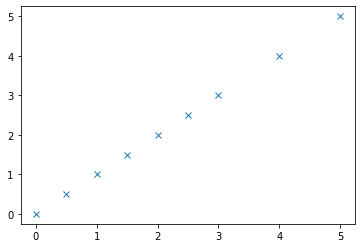

In [136]:
fig = plt.figure(1)  # An empty figure with no axes
plt.plot(x[:,1], y, 'x')

## Cost function
Also it is useful for simple test cases to not just run an optimization but first to do a systematic search. So let us first calculate the values of the cost function for different parameters theta


In [137]:
theta0 = np.arange(-2, 2.01, 0.25)
theta1 = np.arange(-2, 3.01, 0.25)
J = np.empty((len(theta0), len(theta1)))
# Calculate values of the cost function
for i in range(len(theta0)):  
    for j in range(len(theta1)):
        J[i,j], loss = costFunction(x, y, [theta0[i], theta1[j]]) 

        # HERE YOU HAVE TO ADD THE COST FUNCTION FROM THE LECTURE


## Visualize the cost function
Let us do some test plots to see the cost function J and to analyze how it depends on the parameters theta0 and theta1


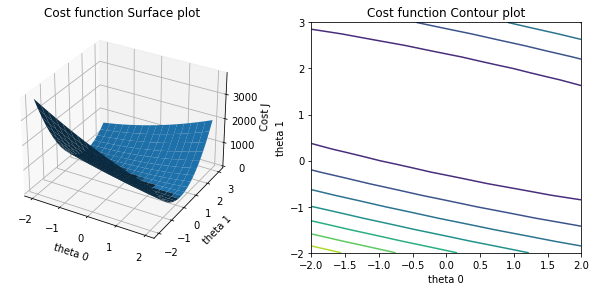

In [138]:
theta0, theta1 = np.meshgrid(theta0, theta1)
fig2 = plt.figure(2)
ax = fig2.add_subplot(121, projection="3d")
surf = ax.plot_surface(theta0, theta1, np.transpose(J))
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Cost J')
ax.set_title('Cost function Surface plot')

ax = fig2.add_subplot(122)
contour = ax.contour(theta0, theta1, np.transpose(J))
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_title('Cost function Contour plot')

fig2.subplots_adjust(bottom=0.1, right=1.5, top=0.9)

## Gradient descent implementation
Here we implement Gradient Descent


In [139]:
alpha = 0.05       # learning parameter
maxsteps= 1000     # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2, 0]

thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)

## Print found optimal values



In [140]:
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])



Optimized Theta0 is  3.9852928379029545e-07
Optimized Theta1 is  0.9999998725702243


## Visualization of the solution
Now let's plot the found solutions of the Gradient Descent algorithms on the contour plot of our cost function to see how it approaches the desired minimum.


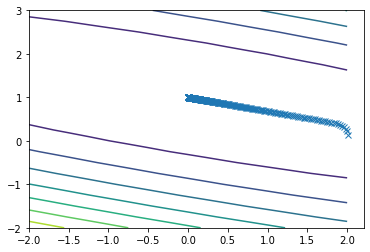

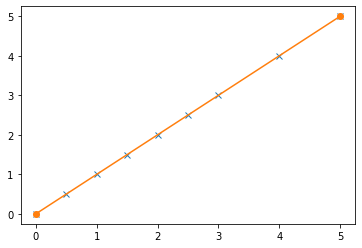

In [141]:
fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

this is the out put of the gradiant method for given alpha and maxstep, as you can see, the prediction is really good the line is covering all the data points 

# What happens if the learning rate is too high or too low?

In [142]:
alpha = 0.3      # learning parameter
maxsteps= 1000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2, 0]

thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)

In [143]:
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])

Optimized Theta0 is  -6.261272570345227e+123
Optimized Theta1 is  -1.9581769321561998e+124


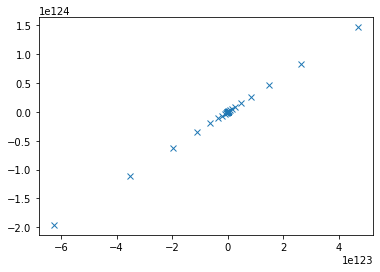

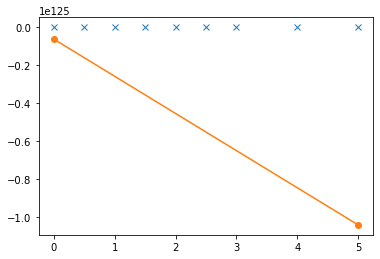

In [144]:
fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

Here i put large number for alpha and you can see the overshooting clearly. I used 0.3 because if I put really big number for alpha then my theta gonna become so big that we cant have obvious result.

In [145]:
alpha = 0.001     # learning parameter
maxsteps= 1000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2, 0]

thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)

In [146]:
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])

Optimized Theta0 is  1.5477960951362328
Optimized Theta1 is  0.5049453040467821


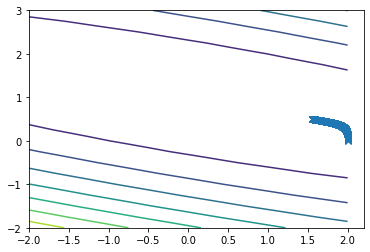

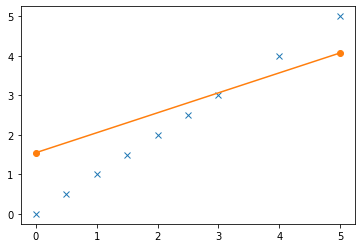

In [147]:
fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

Here im choosing really small number for alpha as you can see we are not getting to the desired answer because change in theta is really small that the algorithm dont have enought time to convarge. but this alpha might work if we change maxstep to bigger number because then it has more time to converge. 

# Can Linear Regression really find the absolute global minimum?

it goes toward the global but in never find the exact value it just converge to it, for example in the first experiment with alpha 0.05 and 1000 maxstep, the value of theta 1 get as close as possible to 1 but never exactly one.

#  What effect does it have if you change the initial guess for thet0 and thet1 for the gradient descent to something completely off?

In [148]:
alpha = 0.05     # learning parameter
maxsteps= 1000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2000, -2000]

thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)

In [149]:
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])

Optimized Theta0 is  0.0004535167610309615
Optimized Theta1 is  0.9998549879732825


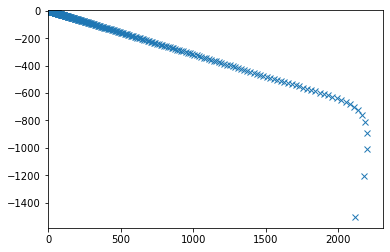

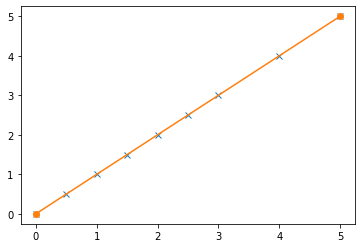

In [150]:
fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

So here with my chose of theta 2000 and -2000 the algorithm converged, but its not just about my theta, I have good maxstep and alpha, but i can have good enough theta but with bad alpha or not enough max step i might not converge.

In [151]:
alpha = 0.05     # learning parameter
maxsteps= 100      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [0.0023, -2000]

thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)

In [152]:
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])

Optimized Theta0 is  123.45612451453698
Optimized Theta1 is  -38.47510734961182


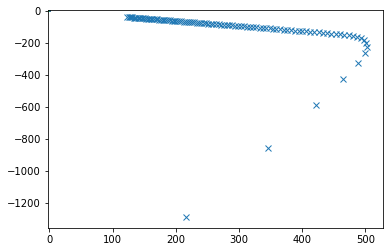

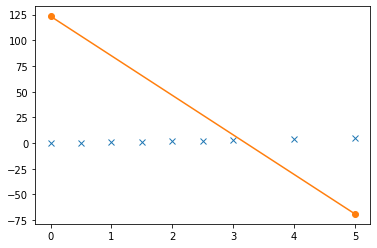

In [153]:
fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

as you can see here i changed my theta and the max step, if i have this theta with 1000 max step its gonna converge but with 100 max step it does not have enough time to get to a good answer. as you can see in the first graph we are going to the right direction but just not getting there. 

# What happens if you are not updating thet0 and thet1 “simultaneously” as you should but you are updating both parameters in separate for-loops (see code)?

In [154]:
def gradientDescent(x, y, theta, alpha, m, maxsteps):
    # HERE YOU HAVE TO IMPLEMENT THE UPDATE OF THE PARAMETERS
    thetaHist=np.empty([maxsteps, 2])
#     xTrans = x.transpose()
    for i in range(0, maxsteps):
        loss = costFunction(x,y,theta)[1]
        theta[0] = theta[0] - (alpha/m) * sum(loss)
        
        
    for i in range(0, maxsteps):
        loss = costFunction(x,y,theta)[1]
        theta[1] = theta[1] - (alpha/m) * sum(np.multiply(x[:,1], loss))
    
    thetaHist[i] = theta
    return theta, thetaHist

In [155]:
alpha = 0.05     # learning parameter
maxsteps= 1000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2, 0]

thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)

In [156]:
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])

Optimized Theta0 is  2.1666666666666625
Optimized Theta1 is  0.3372549019607855


/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/matplotlib/ticker.py:2247: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


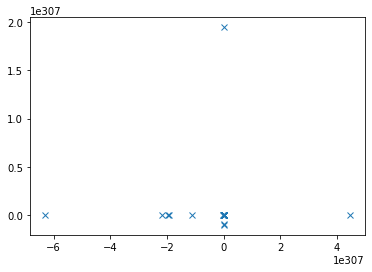

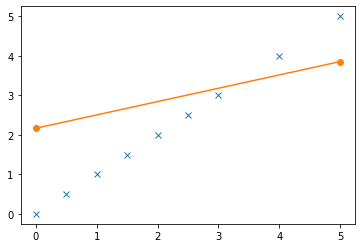

In [157]:
fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

as you can see this not gonna work, because in our cost function we are taking both theta 0 and theta 1 and calculating the cost with the values of both. so the formula is gonna work if we change both theta0 and theta1 with learning rate at the same time and going to the direction of minimum, its not suited for first fixing theta0 and then theta1. the reason is we are taking the derivitives and when you change one the drection change but the value of the other one didnt adapt. so at the end it tries to go to the right direction but it gonna take longere to converge.

# How many iterations of the gradient descent algorithm do you have to calculate to reach the correct exact values of theta0 and theta1?

so we never get to the exact value of theta0 and theta1 as algorithm sais we just wanna converge to a specific number for example as you can see for the first experiment with the given data we are getting 0.99999999 for theta1 and we can see that its converging to 1 but we are not gonna get exactly 1.